In [35]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))

df.lot_frontage.trimmed = df.lot_frontage %>%
    mutate(
        LotArea.Log.normed = abs(LotArea.Log - mean(LotArea.Log)) / sd(LotArea.Log),
        LotArea.Log.isOutlier = LotArea.Log.normed >= 3) %>%
    filter(LotArea.Log.isOutlier == FALSE) %>%
    select(-LotArea.Log.isOutlier)

df.lot_frontage %>% count()
df.lot_frontage.trimmed %>% count()

n
2433


n
2368


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.5871939,0.5870241,0.2299065,3457.964,0,2,125.4342,-244.8685,-227.4778,128.4953,2431


term,estimate,std.error,statistic,p.value
(Intercept),-0.8169321,0.085101273,-9.599528,1.917586e-21
LotArea.Log,0.5512073,0.009373564,58.804455,0.000000e+00


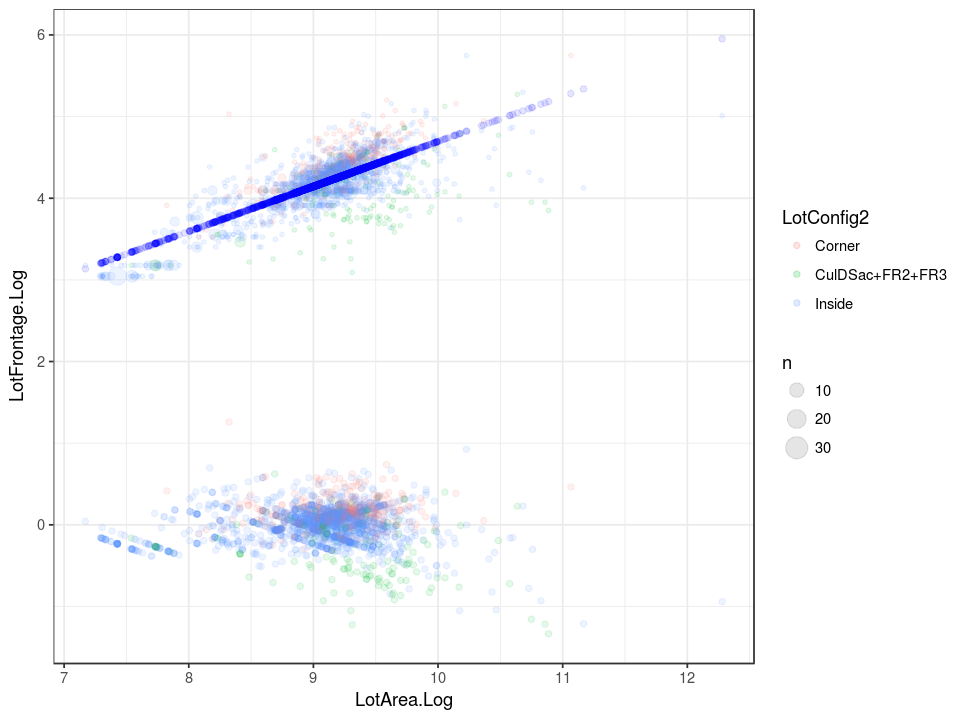

In [67]:
options(repr.plot.width = 8, repr.plot.height = 6)

model = df.lot_frontage %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df.lot_frontage %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

model %>% glance(mod)
model %>% tidy(mod)

ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = LotConfig2), alpha=0.1) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.1, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=LotConfig2), alpha=0.1) +
    theme_bw()

In [4]:
colNames = names(which(sapply(df.lot_frontage, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.rsquared = df.lot_frontage %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.))) %>%
    select(attr, attr_val, r.squared)

df.freq = df.lot_frontage %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    summarise(n=n())%>%
    mutate(freq = n / sum(n))

df.joint = inner_join(df.rsquared, df.freq, by = c("attr", "attr_val"))
df.joint %>% 
    mutate(freq.rsquared = r.squared * freq) %>% 
    group_by(attr) %>%
    summarise(rsquared.expect = sum(freq.rsquared)) %>%
    arrange(desc(rsquared.expect)) %>% head()

attr,rsquared.expect
LotConfig,0.6512306
LotConfig2,0.6454040
LotShape,0.6092392
LotShape2,0.6000610
LandSlope,0.5976722
LandContour,0.5967093


LotConfig2,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
Corner,0.6090078,0.6080424,0.1823055,630.82623,1.315209e-84,2,116.23758,-226.4752,-214.4487,13.46029,405
CulDSac+FR2+FR3,0.2875249,0.2831269,0.3564402,65.37638,1.365161e-13,2,-62.51919,131.0384,140.3380,20.58203,162
Inside,0.6848806,0.6847112,0.1959327,4042.52482,0.000000e+00,2,393.96767,-781.9353,-765.3471,71.40467,1860


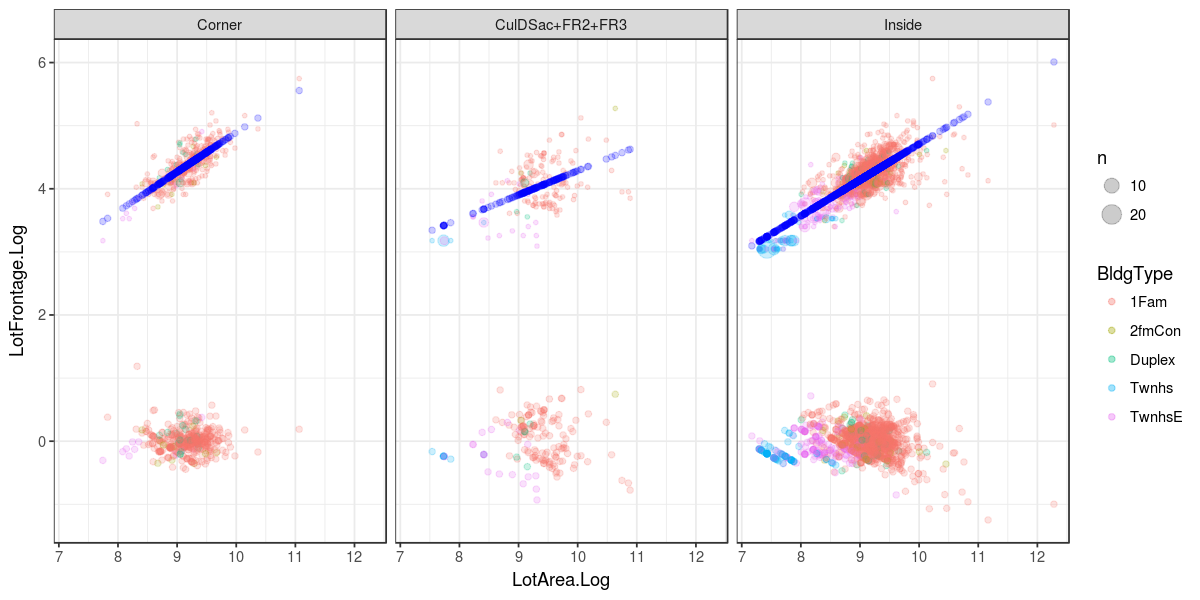

In [76]:
options(repr.plot.width = 10, repr.plot.height = 5)

models = df.lot_frontage %>% 
    group_by(LotConfig2) %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df.lot_frontage %>% 
    group_by(LotConfig2) %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

models %>% glance(mod)

ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour=BldgType), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.2, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType), alpha=0.2) +
    facet_wrap(~LotConfig2) +
    theme_bw()

[1] "MSSubClass"       "MSZoning"         "LotFrontage"      "LotArea"         
 [5] "Street"           "Alley"            "LotShape"         "LandContour"     
 [9] "Utilities"        "LotConfig"        "LandSlope"        "Neighborhood"    
[13] "Condition1"       "Condition2"       "BldgType"         "HouseStyle"      
[17] "OverallQual"      "OverallCond"      "YearBuilt"        "YearRemodAdd"    
[21] "RoofStyle"        "RoofMatl"         "Exterior1st"      "Exterior2nd"     
[25] "MasVnrType"       "MasVnrArea"       "ExterQual"        "ExterCond"       
[29] "Foundation"       "BsmtQual"         "BsmtCond"         "BsmtExposure"    
[33] "BsmtFinType1"     "BsmtFinSF1"       "BsmtFinType2"     "BsmtFinSF2"      
[37] "BsmtUnfSF"        "TotalBsmtSF"      "Heating"          "HeatingQC"       
[41] "CentralAir"       "Electrical"       "X1stFlrSF"        "X2ndFlrSF"       
[45] "LowQualFinSF"     "GrLivArea"        "BsmtFullBath"     "BsmtHalfBath"    
[49] "FullBath"         "HalfBath"         "BedroomAbvGr"     "KitchenAbvGr"    
[53] "KitchenQual"      "TotRmsAbvGrd"     "Functional"       "Fireplaces"      
[57] "FireplaceQu"      "GarageType"       "GarageYrBlt"      "GarageFinish"    
[61] "GarageCars"       "GarageArea"       "GarageQual"       "GarageCond"      
[65] "PavedDrive"       "WoodDeckSF"       "OpenPorchSF"      "EnclosedPorch"   
[69] "X3SsnPorch"       "ScreenPorch"      "PoolArea"         "PoolQC"          
[73] "Fence"            "MiscFeature"      "MiscVal"          "MoSold"          
[77] "YrSold"           "SaleType"         "SaleCondition"    "dataSource"      
[81] "LotArea.Log"      "LotFrontage.Log"  "X1stFlrSF.Log"    "GarageArea.Log"  
[85] "TotRmsAbvGrd.Log" "GrLivArea.Log"    "LotShape2"        "LotConfig2"      
[89] "GarageCarsChar"

LotConfig2,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
Corner,0.568842353,0.567654591,0.1798058,478.9194298,2.689957e-68,2,109.38557,-212.77114,-201.07145,11.73584,363
CulDSac+FR2+FR3,0.005292335,-0.002540009,0.3183138,0.6757026,4.126110e-01,2,-34.36667,74.73333,83.31277,12.86811,127
Inside,0.347560174,0.347126947,0.1829908,802.2588474,7.778040e-142,2,422.30736,-838.61472,-822.65910,50.42934,1506


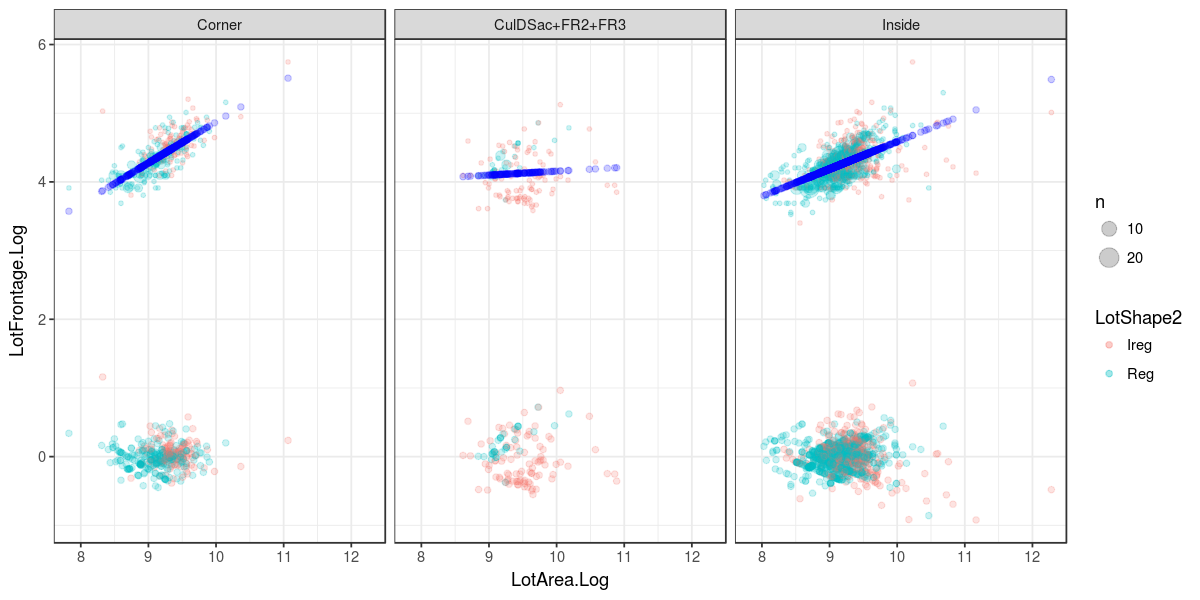

In [77]:
options(repr.plot.width = 10, repr.plot.height = 5)

names(df.lot_frontage)

df.1fam = 
    df.lot_frontage %>% 
    filter(BldgType=='1Fam') %>% 
    group_by(LotConfig2)

models = df.1fam %>% 
    group_by(LotConfig2) %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df.1fam %>% 
    group_by(LotConfig2) %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

models %>% glance(mod)

ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour=LotShape2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.2, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=LotShape2), alpha=0.2) +
    facet_wrap(~LotConfig2) +
    theme_bw()

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)


df.town = 
    df.lot_frontage %>% 
    filter(BldgType %in% c('Twnhs', '') %>% 
    group_by(LotConfig2)

models = df.1fam %>% 
    group_by(LotConfig2) %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df.1fam %>% 
    group_by(LotConfig2) %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

models %>% glance(mod)

ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour=LotShape2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.2, color="blue") +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=LotShape2), alpha=0.2) +
    facet_wrap(~LotConfig2) +
    theme_bw()